# After the experiments are conducted and the results saved I want to analyse them here in a different notebook

In [2]:
from pathlib import Path

import numpy as np
import pandas as pd
import xgboost as xgb
import sklearn as skl

import operator

from mylib import class_distributions
from mylib import data_selection
from mylib import helper_funcs

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [3]:
# open file

data_folder = Path("../../../data/DryBeanDataset/")
file_to_open = data_folder / "Dry_Bean_Dataset.xlsx"

In [4]:
# read and prepare data

data = pd.read_excel(file_to_open)

labels_dict = {key:value for (value,key) in enumerate(data["Class"].unique())}
data["Class"] = data["Class"].map(labels_dict)
#data.Class.astype("category").cat.codes

# need feature matrix X and labels labels for xgboost
labels = data["Class"]
X = data.drop(["Class"],axis=1,inplace=False)

In [5]:
label_proportions = class_distributions.label_proportions(labels)
print(label_proportions)

largest_class_label = max(label_proportions.items(), key=operator.itemgetter(1))[0]
smallest_class_label = min(label_proportions.items(), key=operator.itemgetter(1))[0]

6    0.260525
5    0.193667
0    0.148924
4    0.141650
3    0.119756
1    0.097127
2    0.038351
Name: Class, dtype: float64


In [9]:
helper_funcs.unpack_batch_results('continued_training', 'largest class')

{'old_data': 0.9210531544957774,
 'new_data': 0.918781725888325,
 'full_data': 0.9204613915215634}

Training method: continued_training
largest class


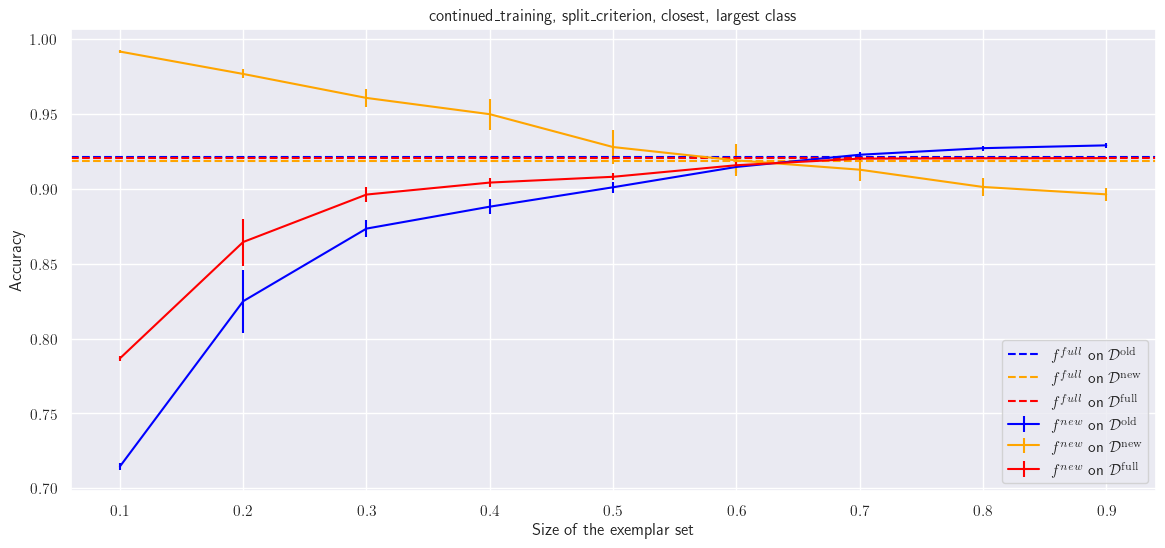

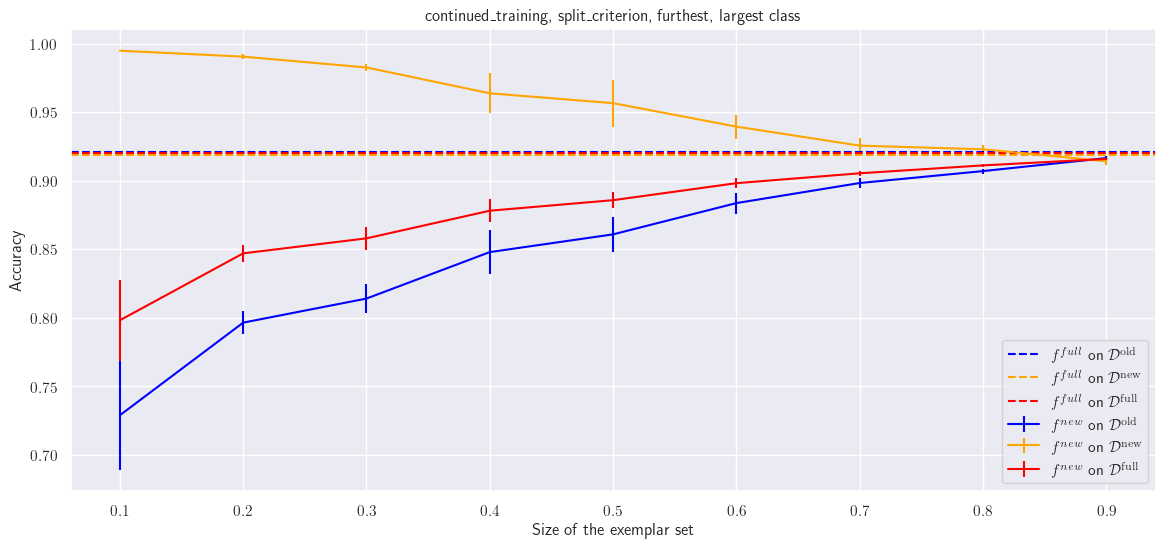

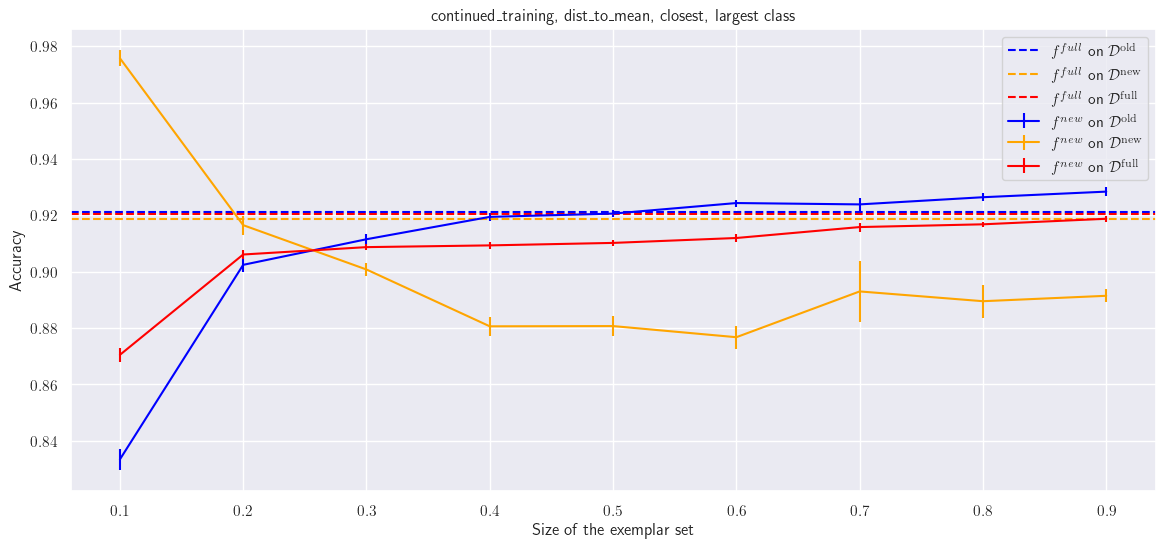

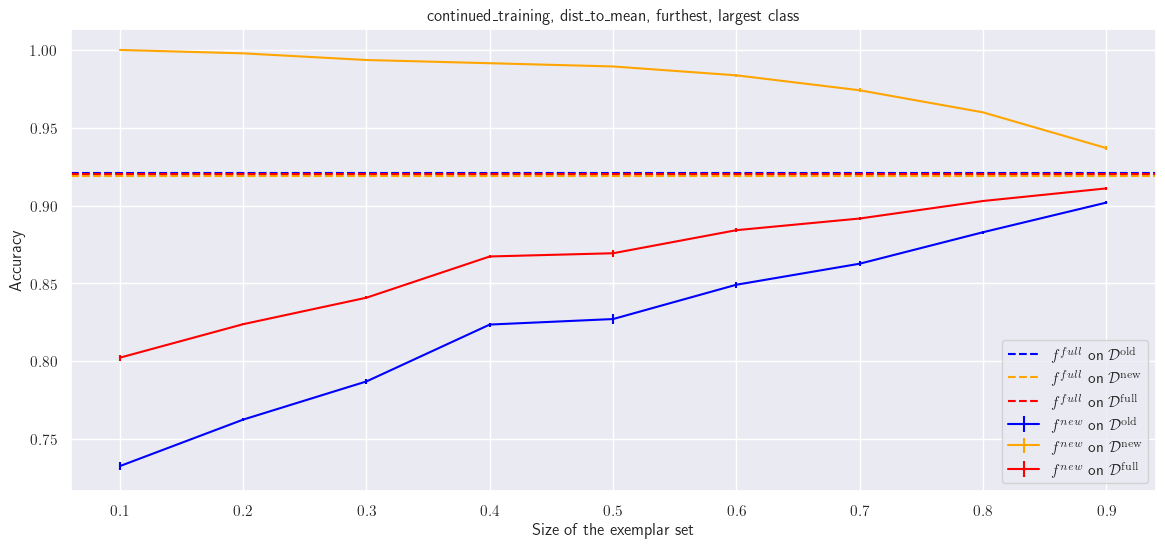

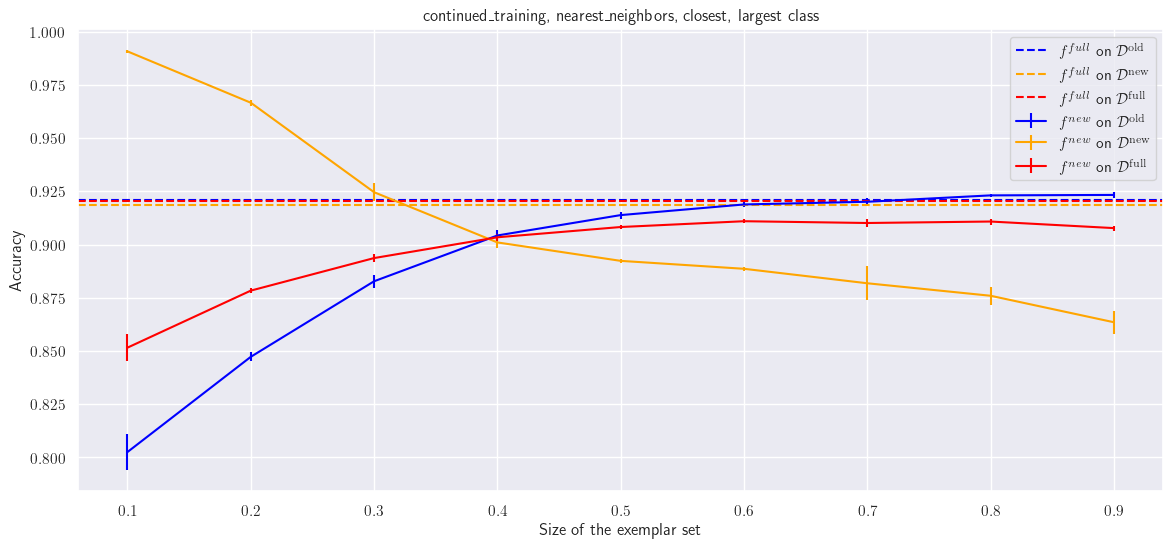

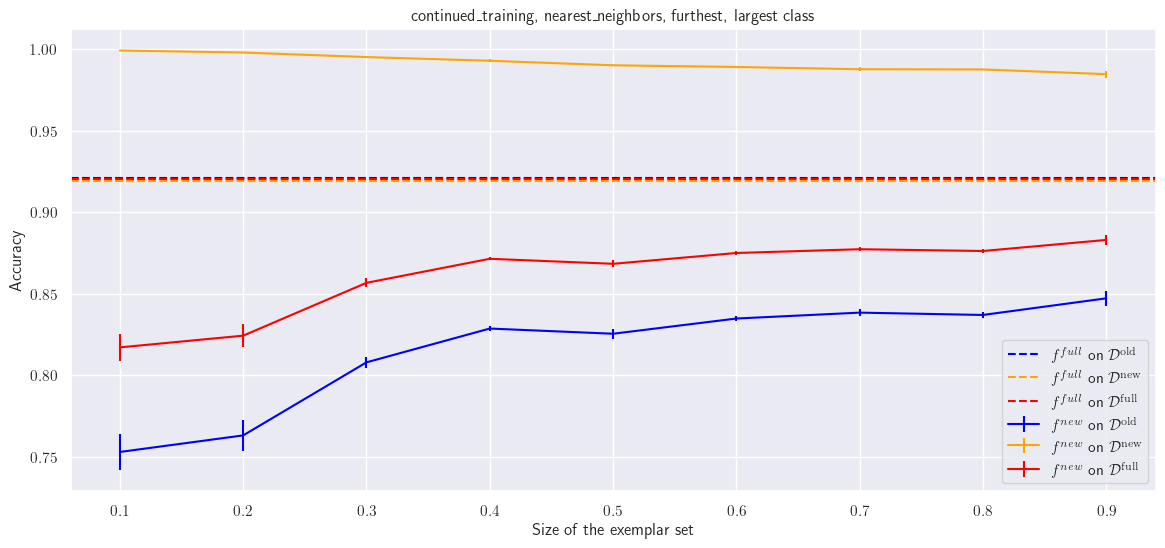

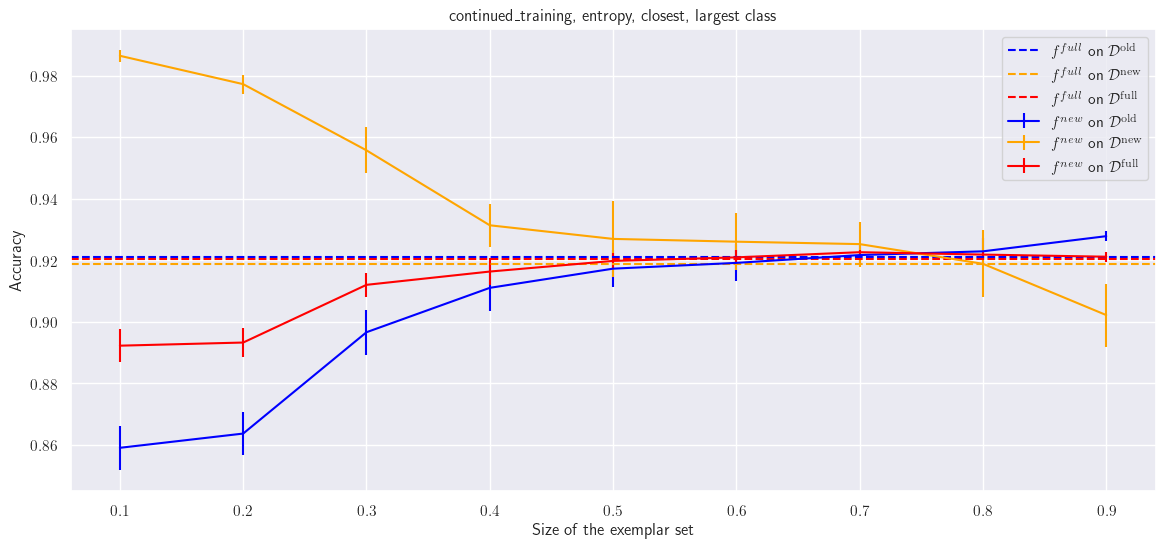

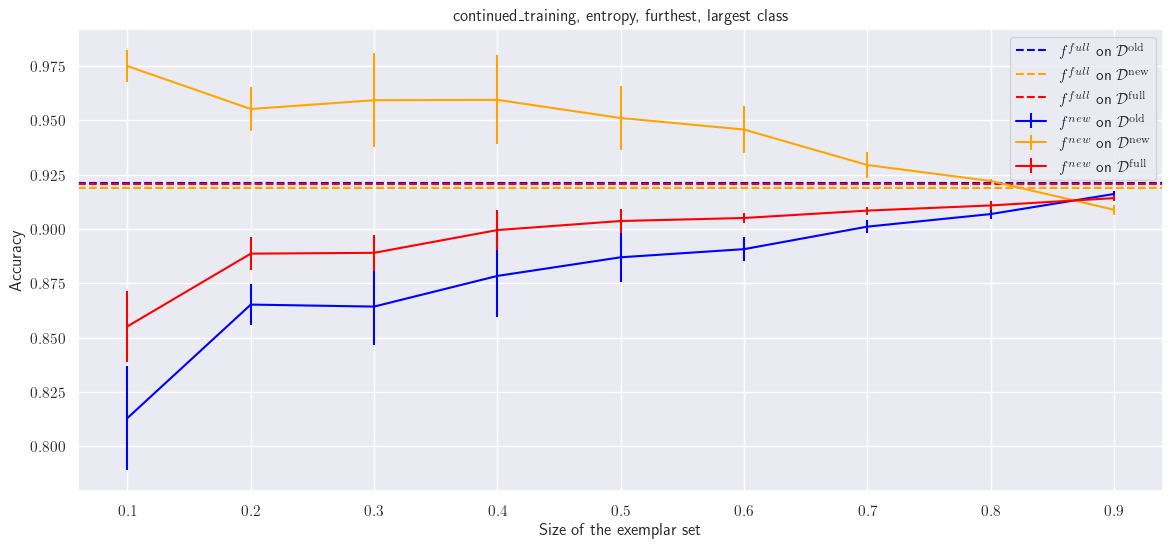

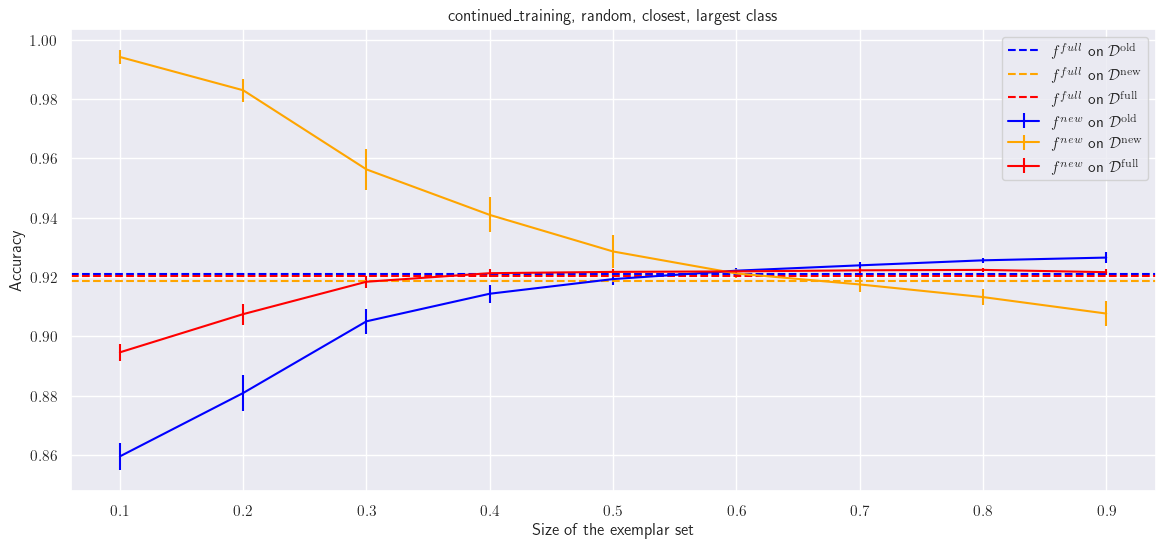

smallest class


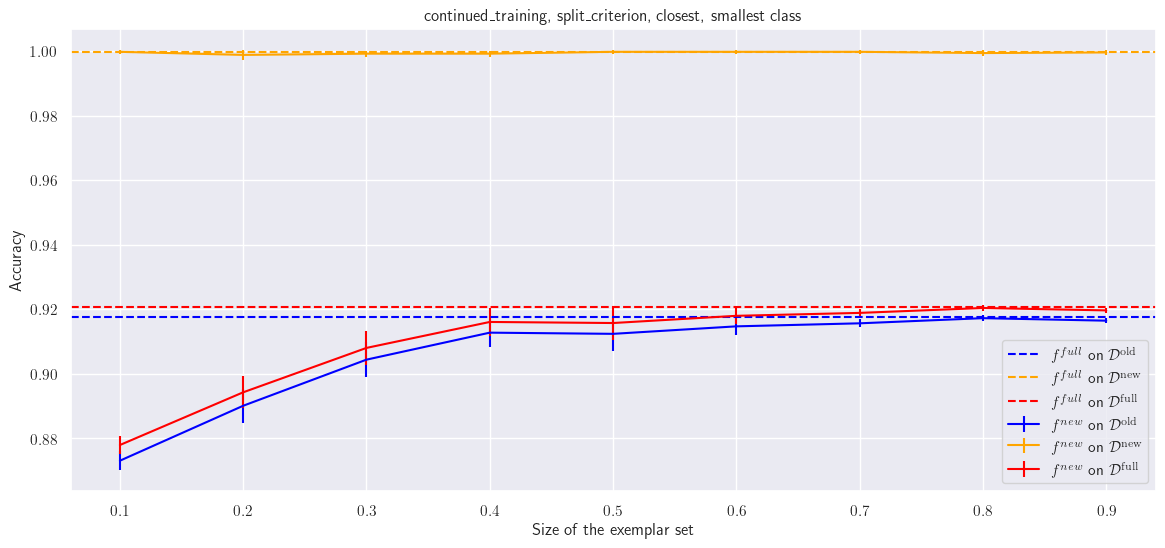

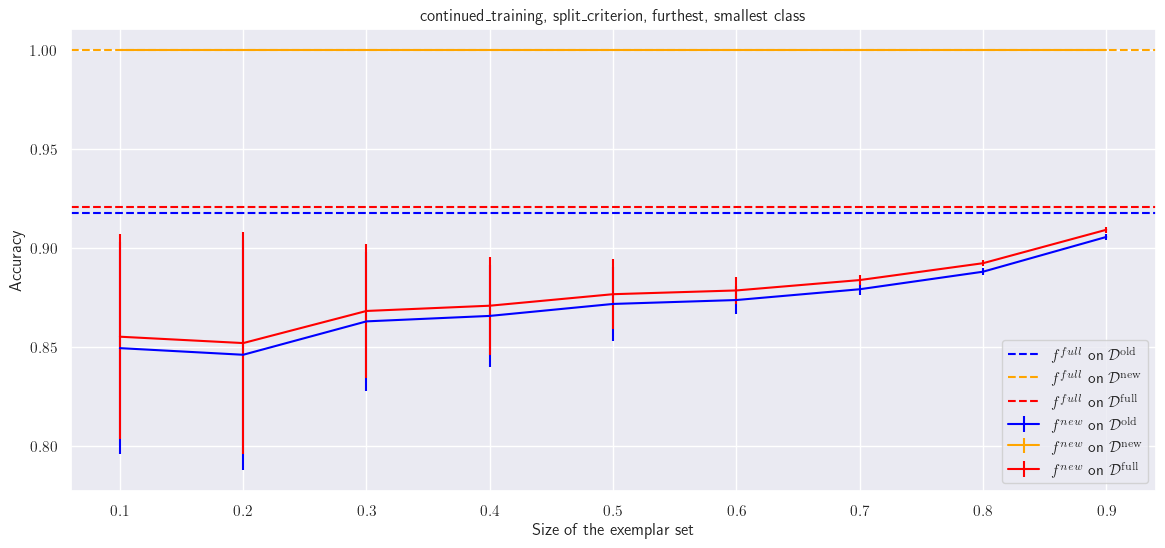

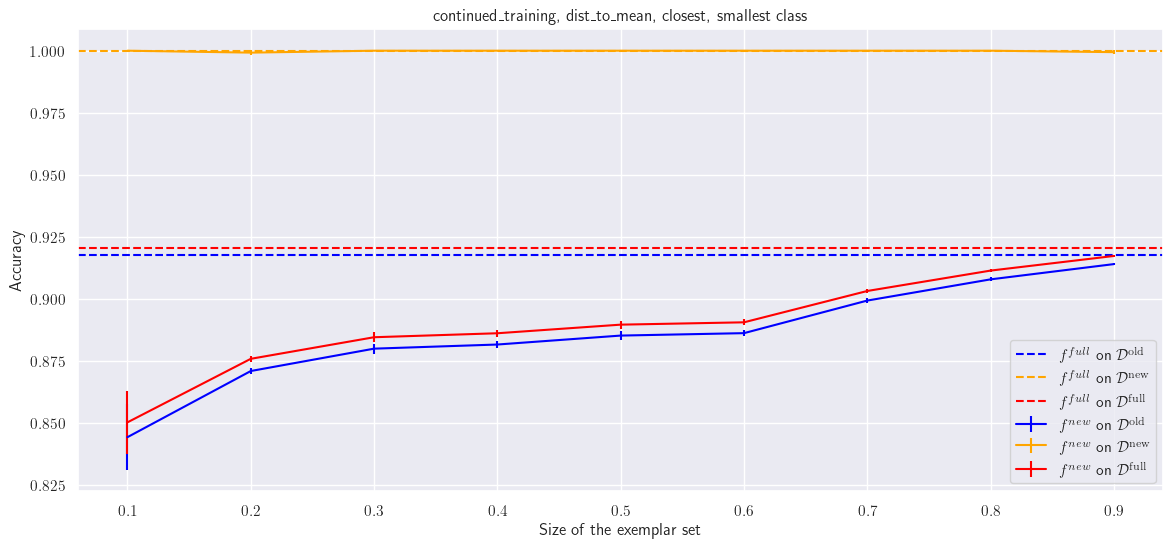

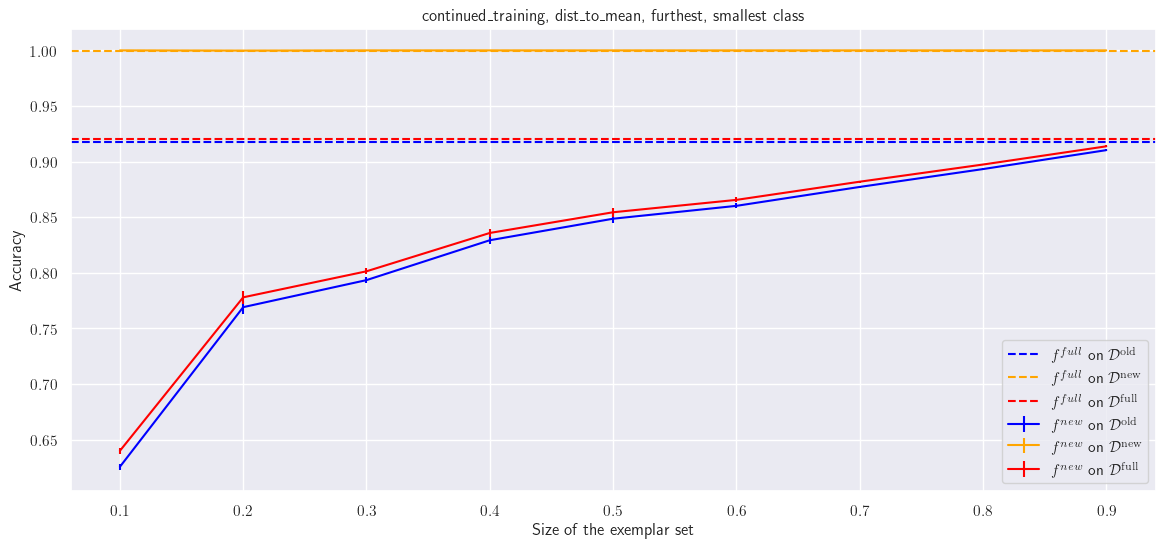

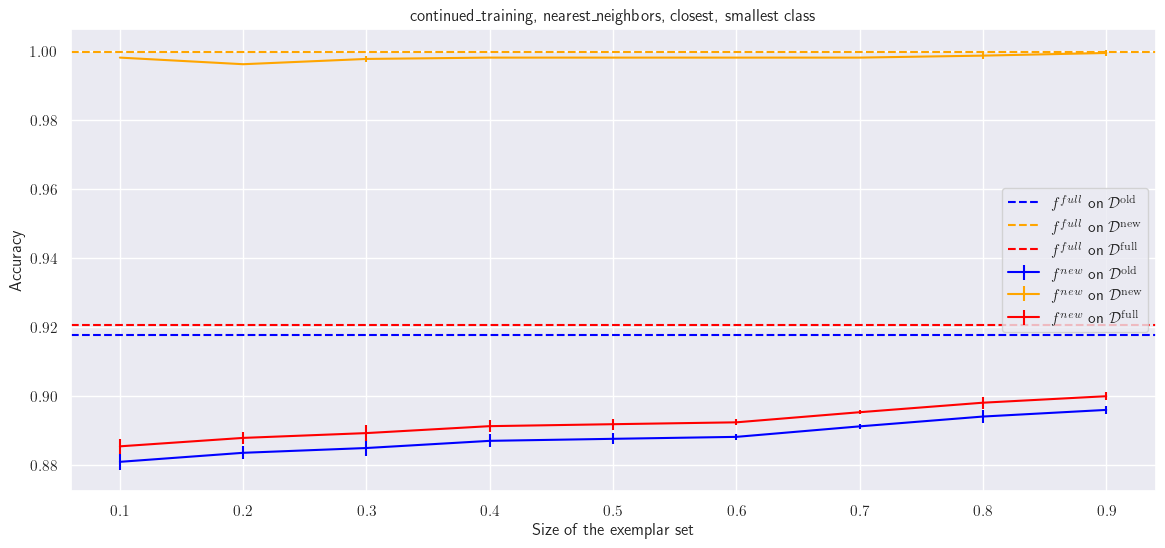

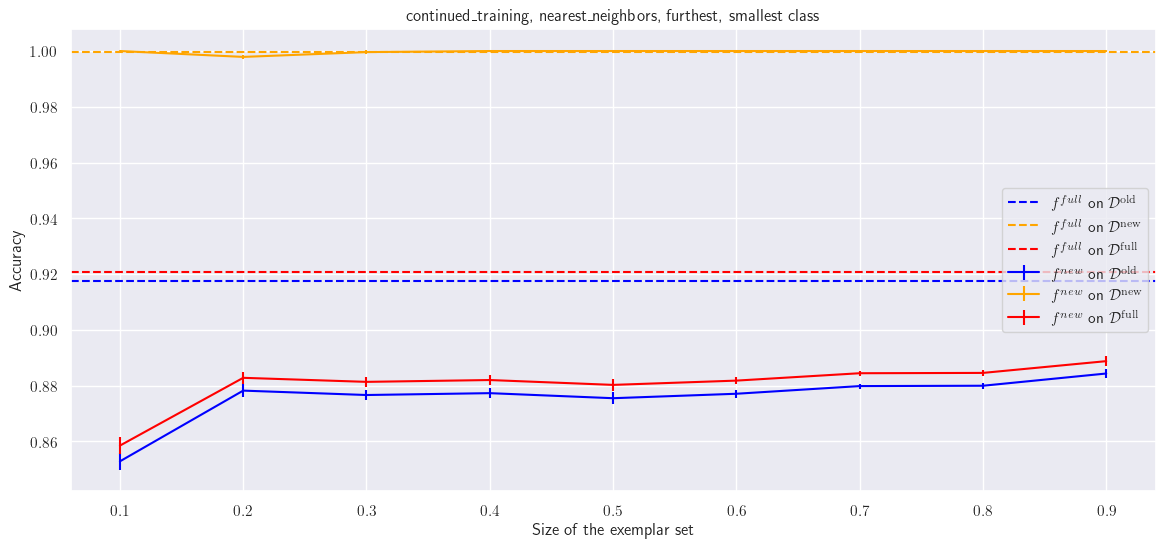

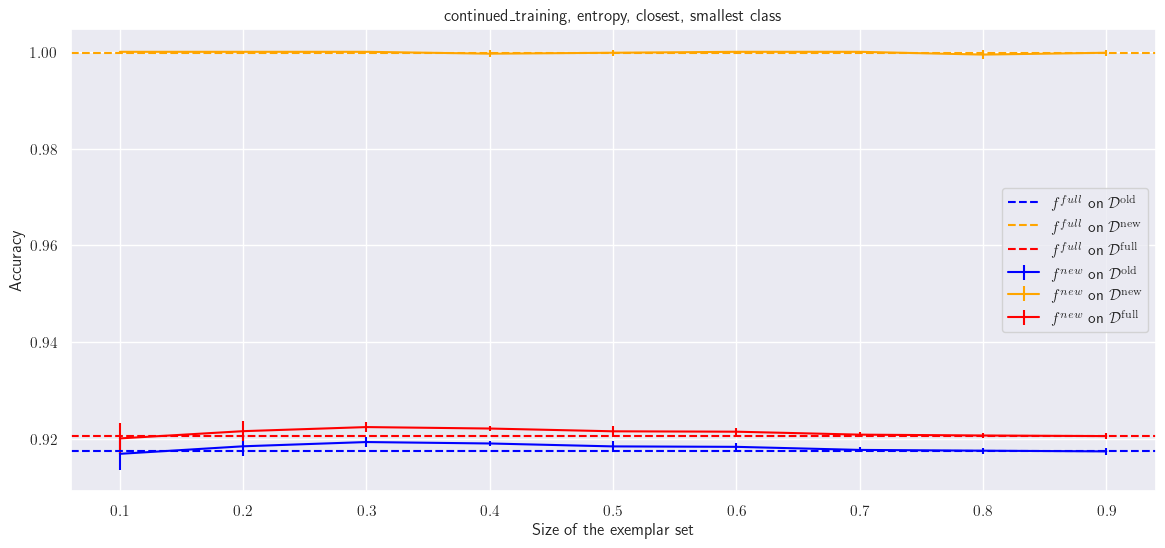

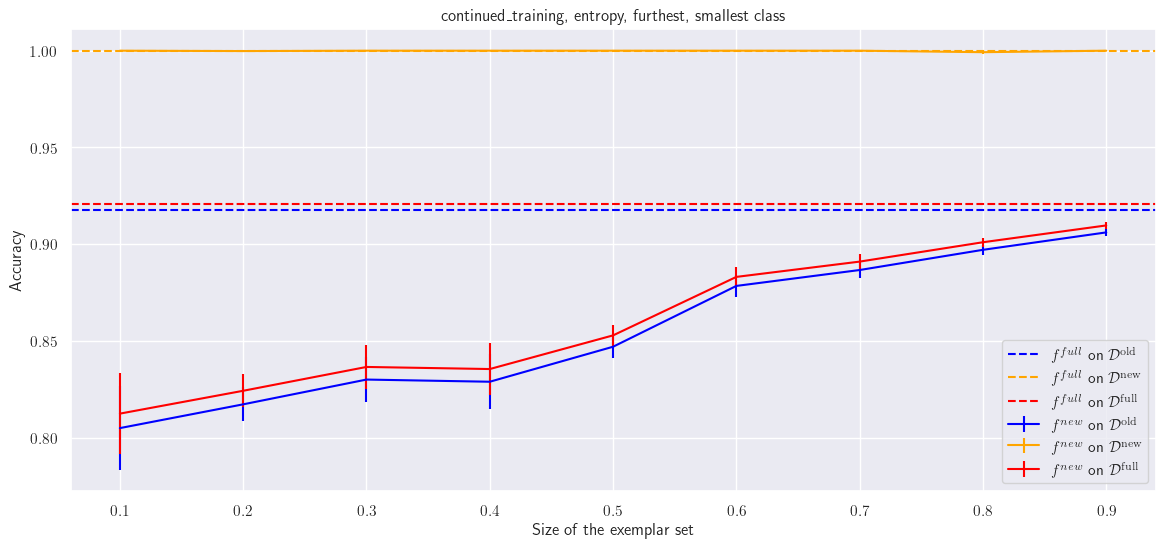

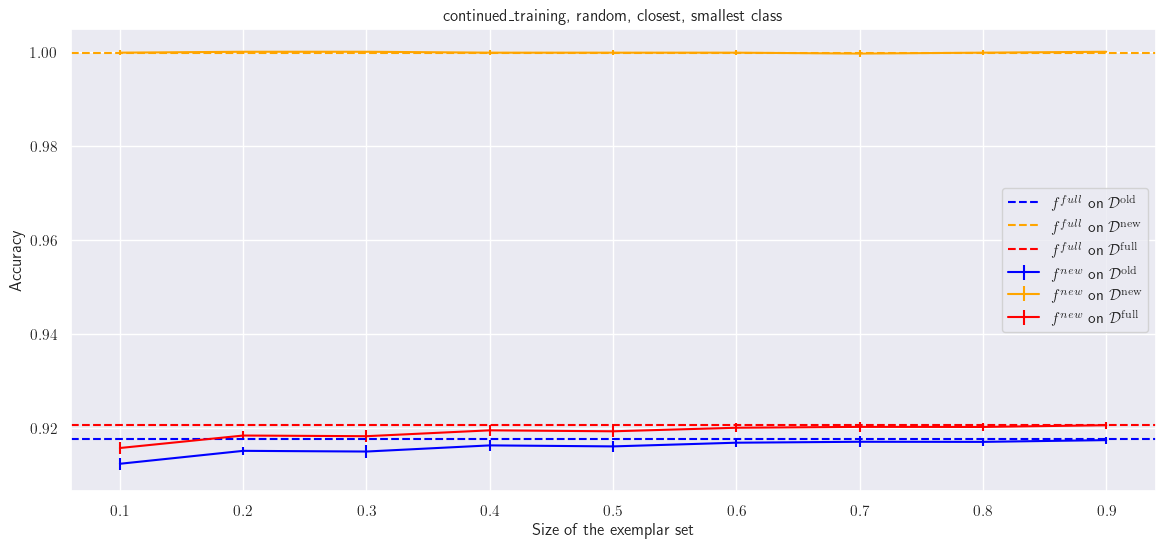

Training method: add_trees
largest class


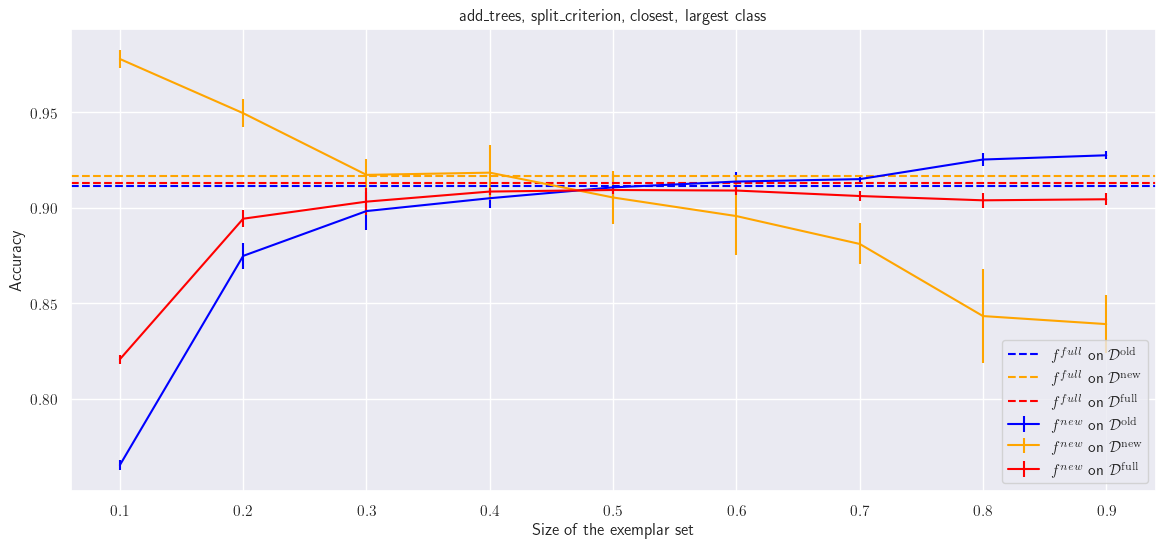

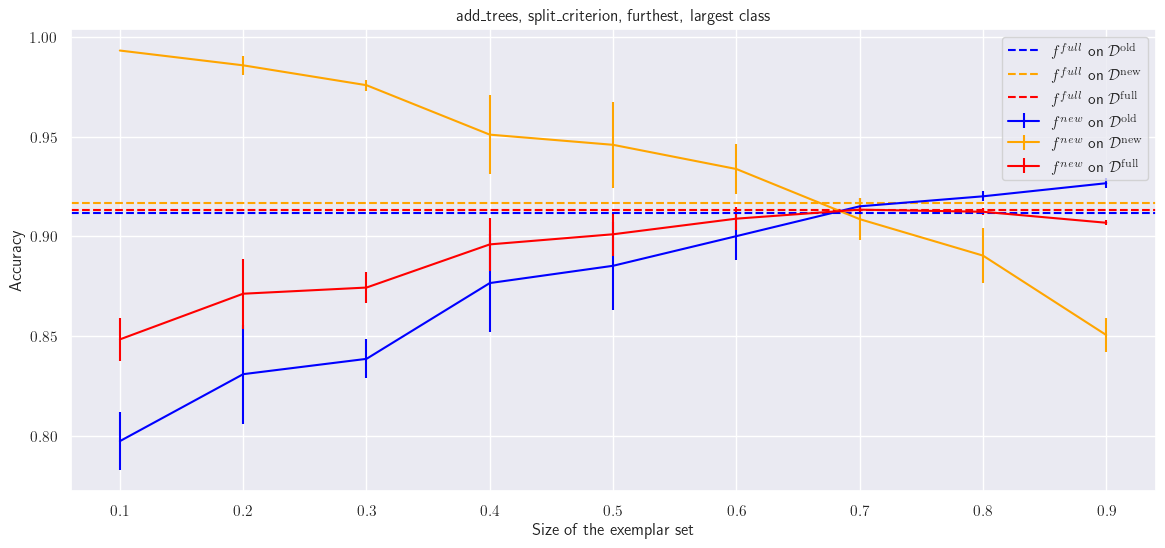

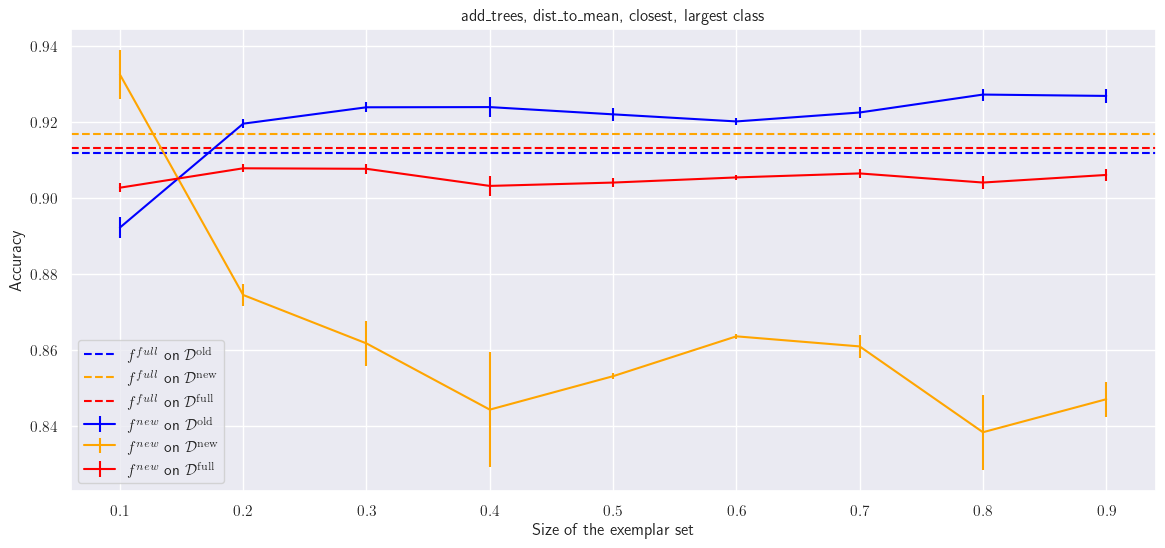

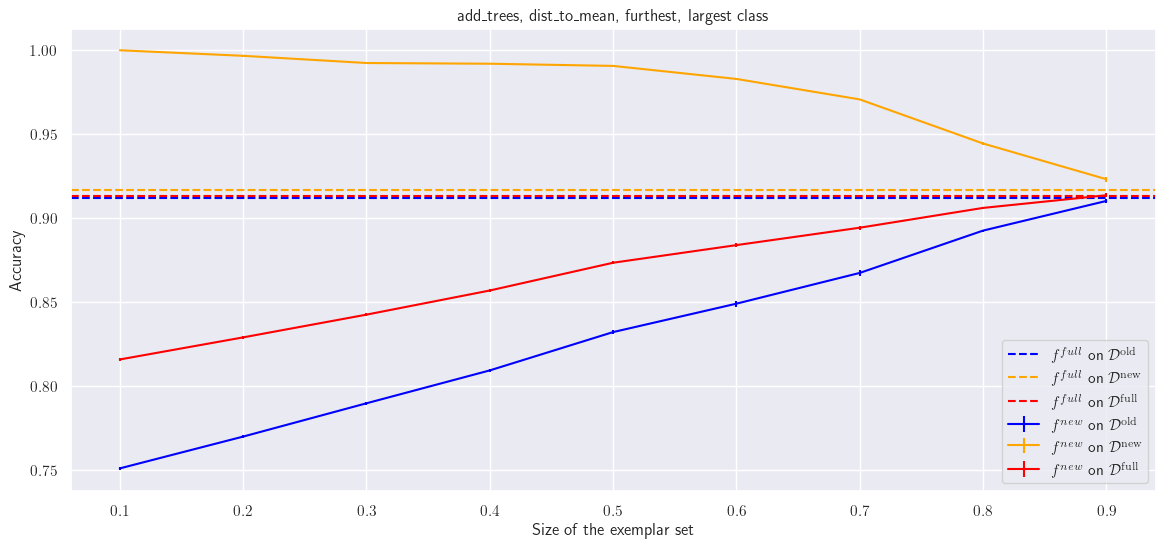

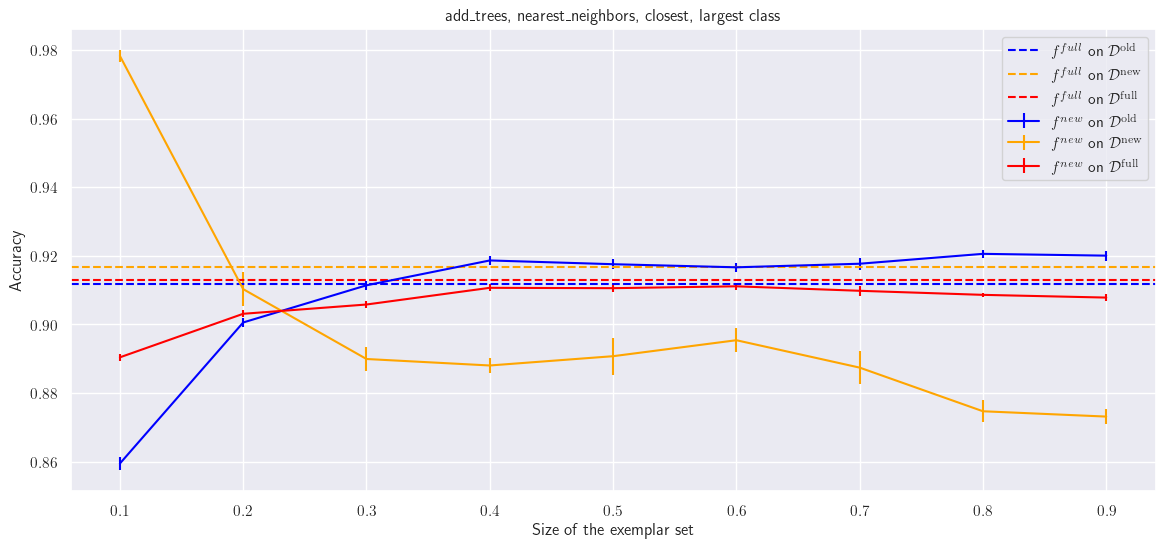

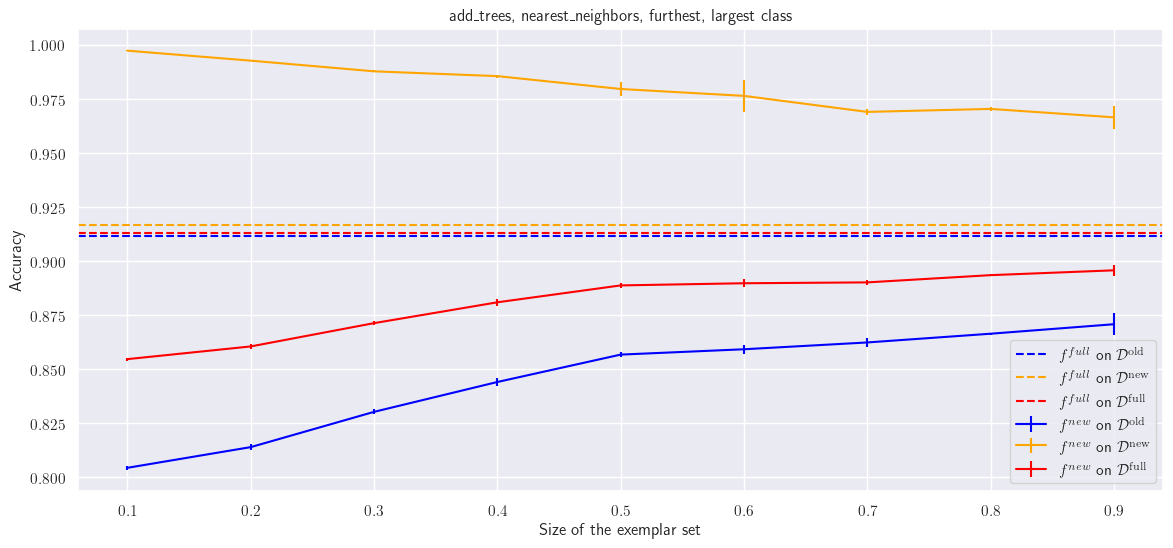

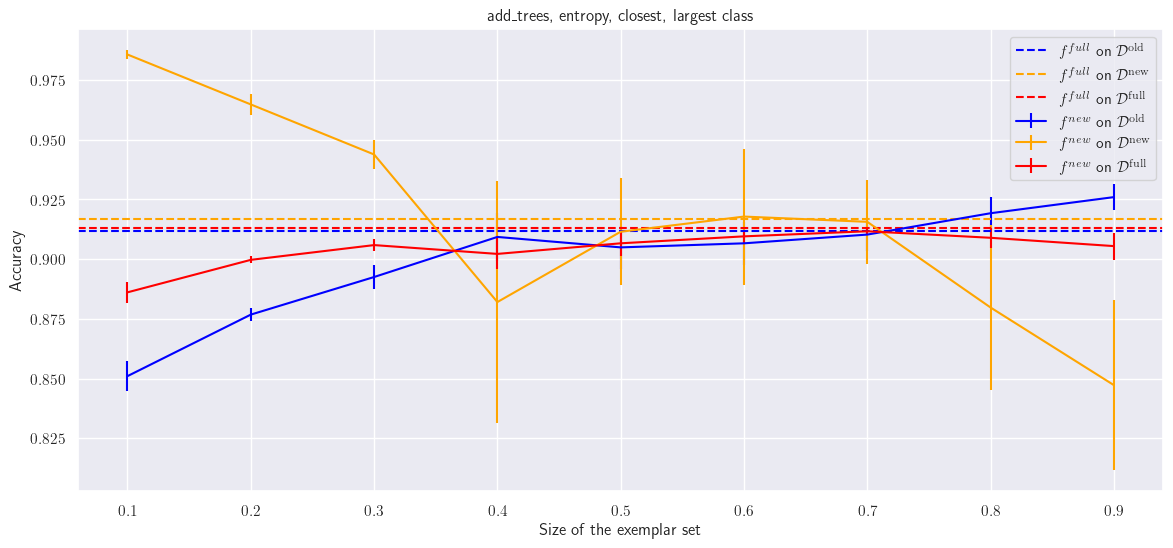

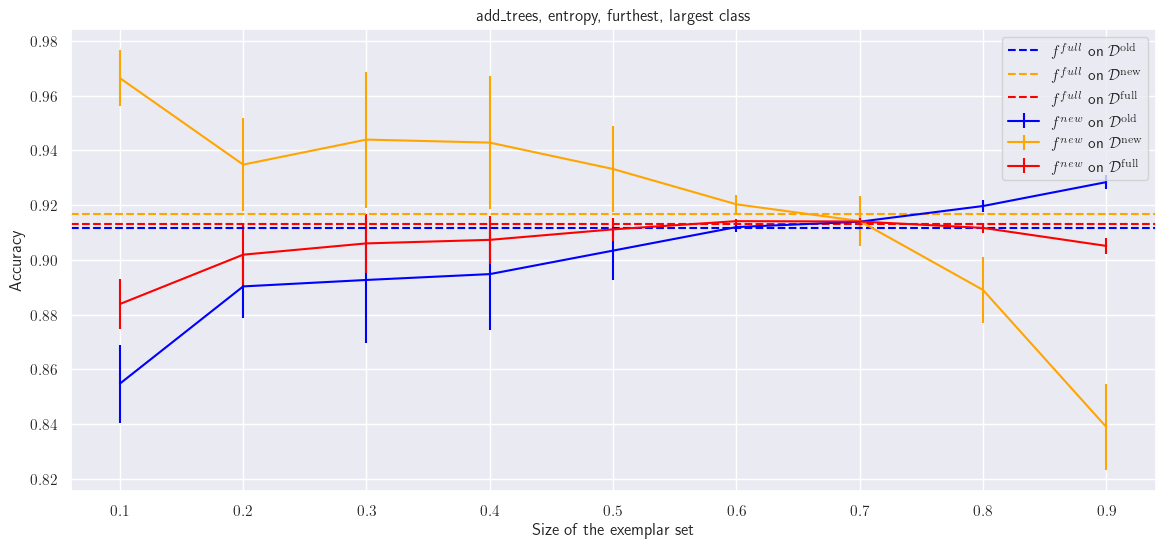

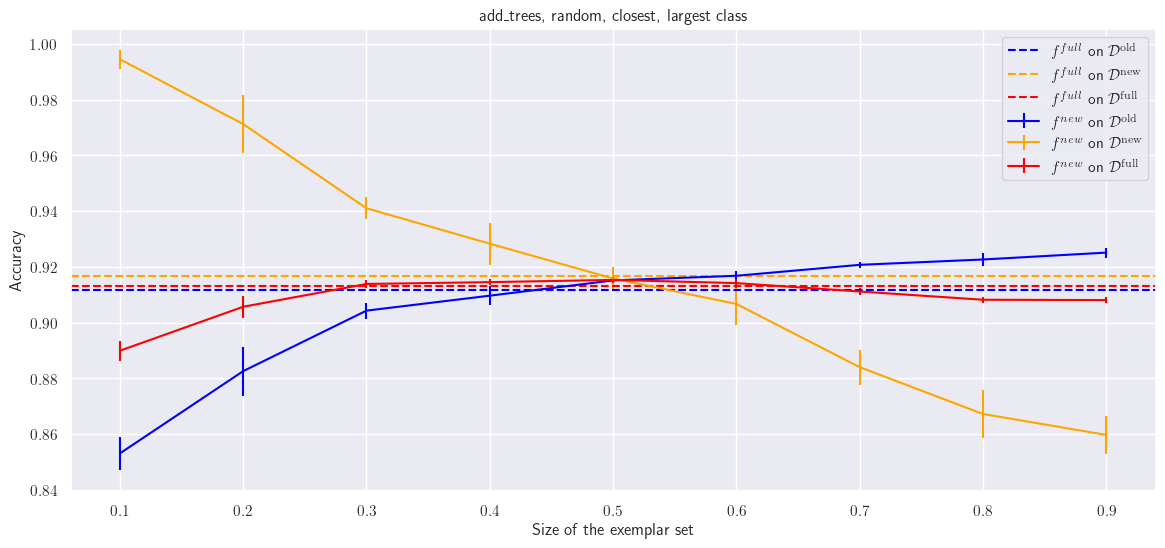

smallest class


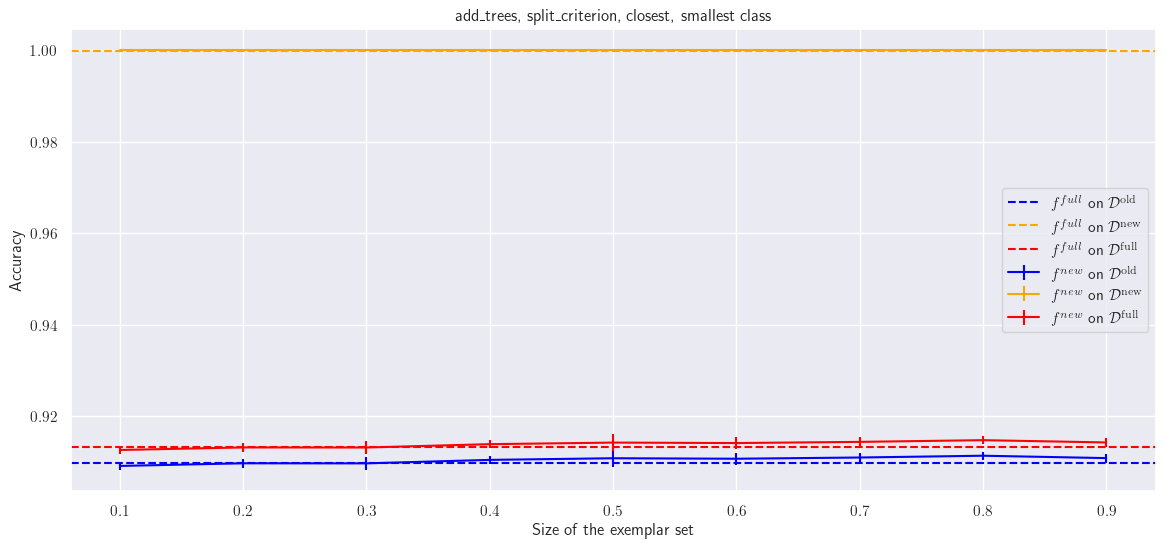

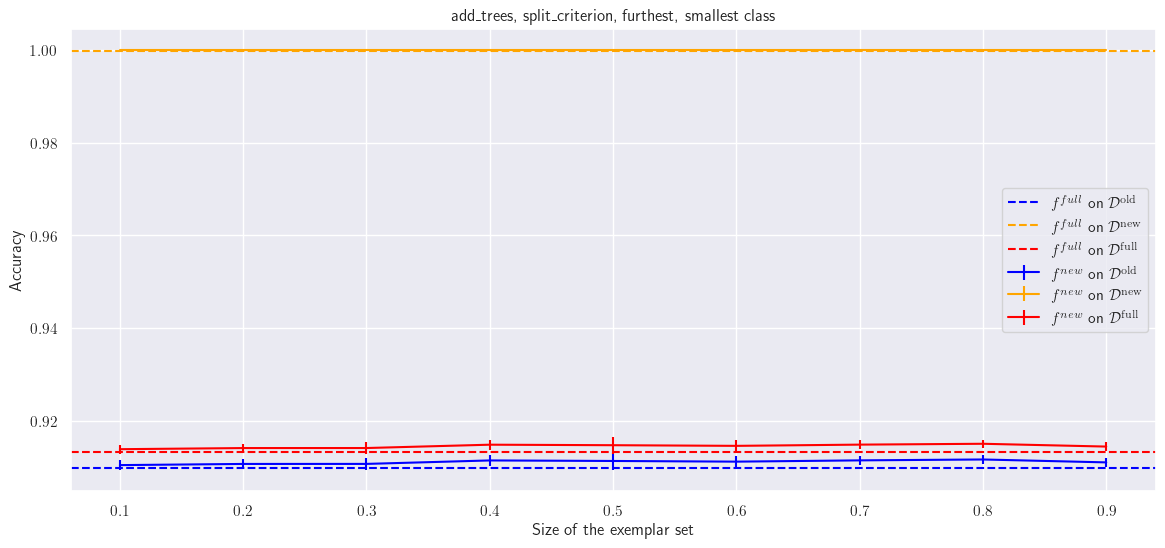

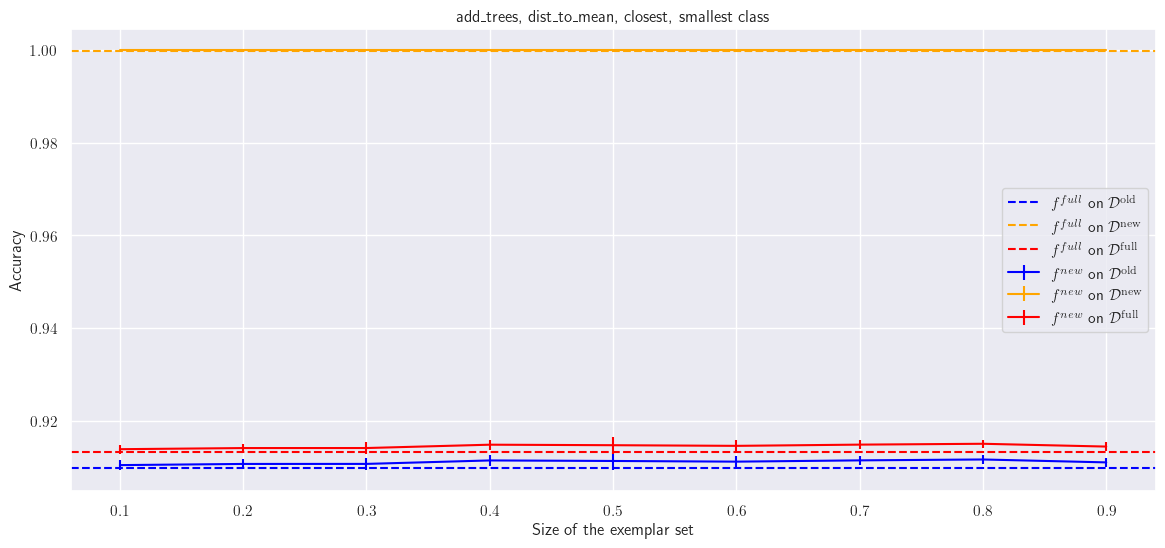

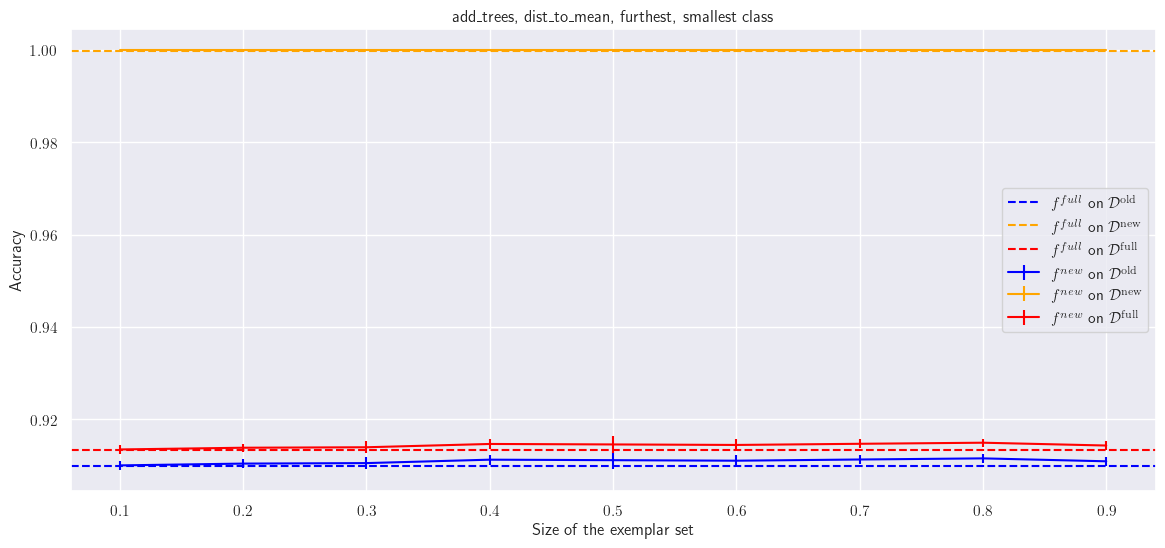

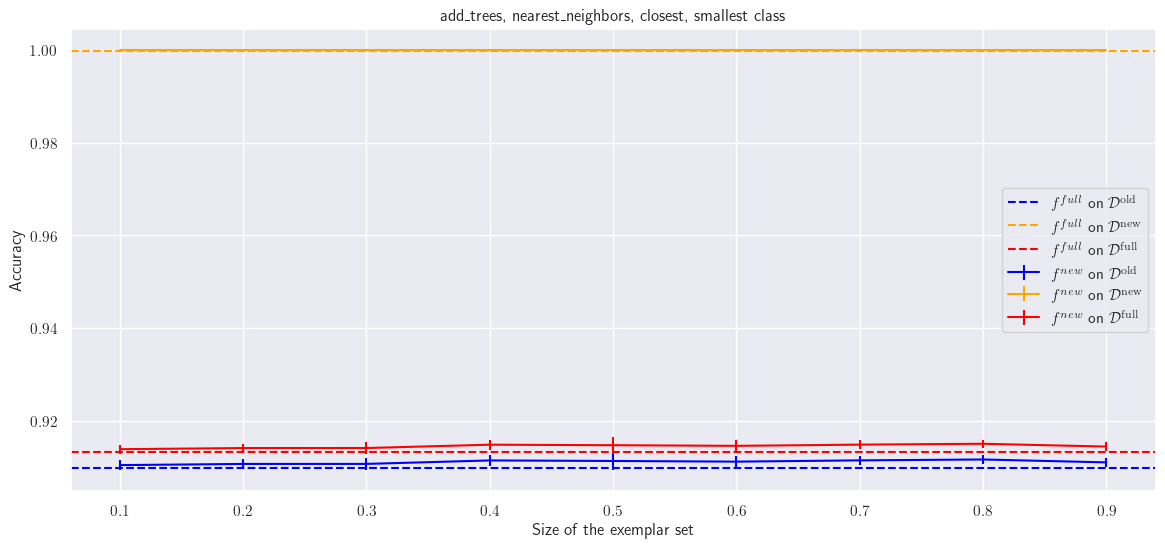

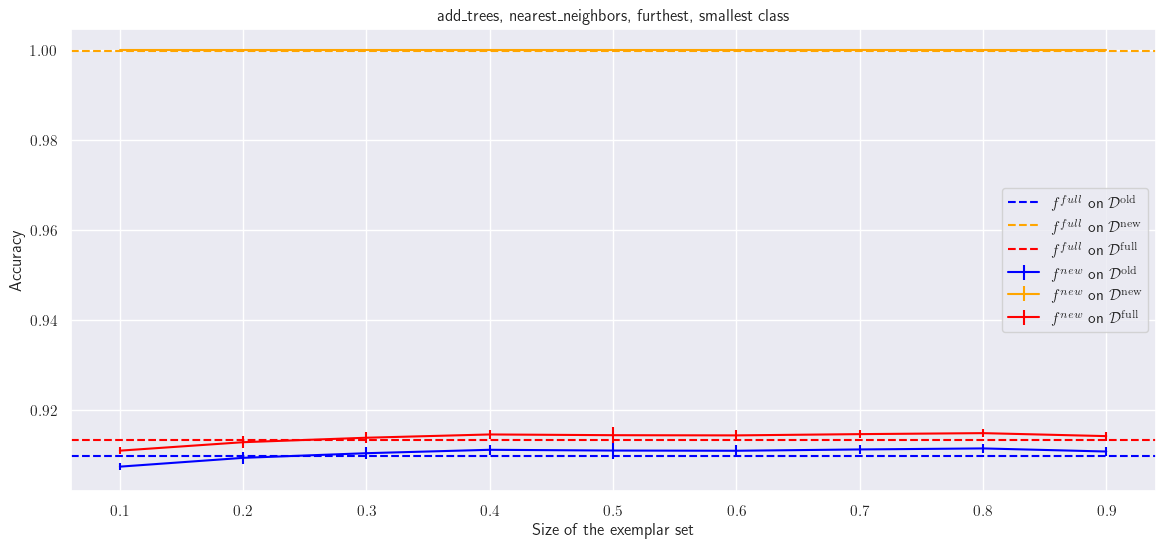

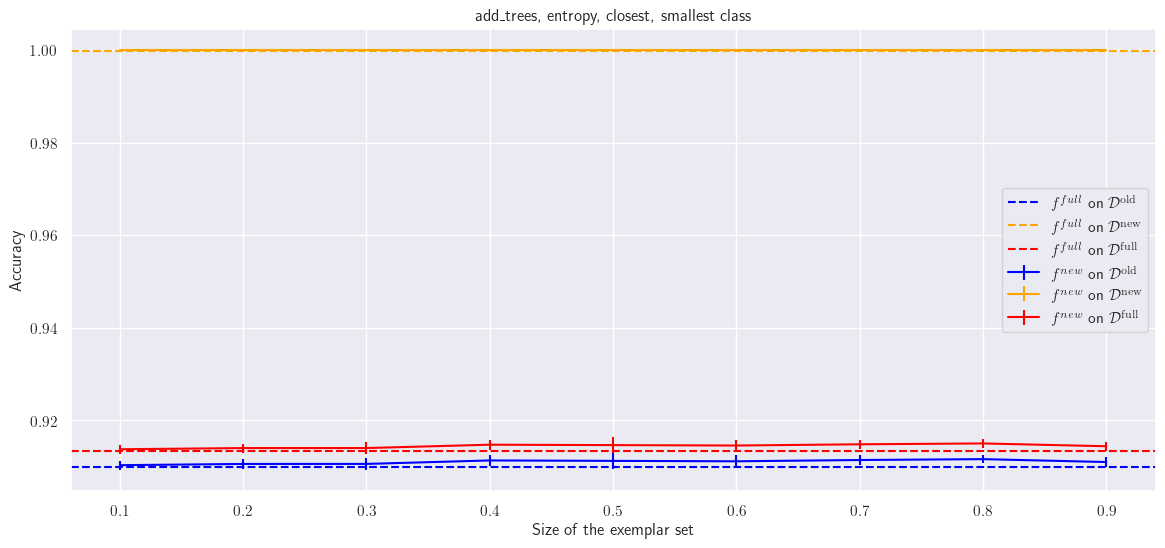

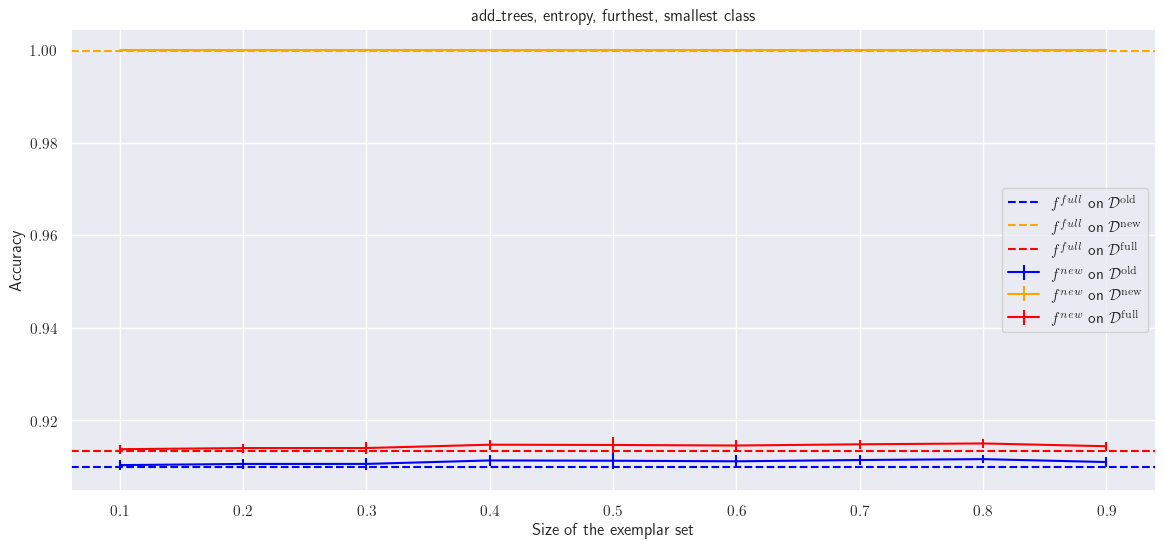

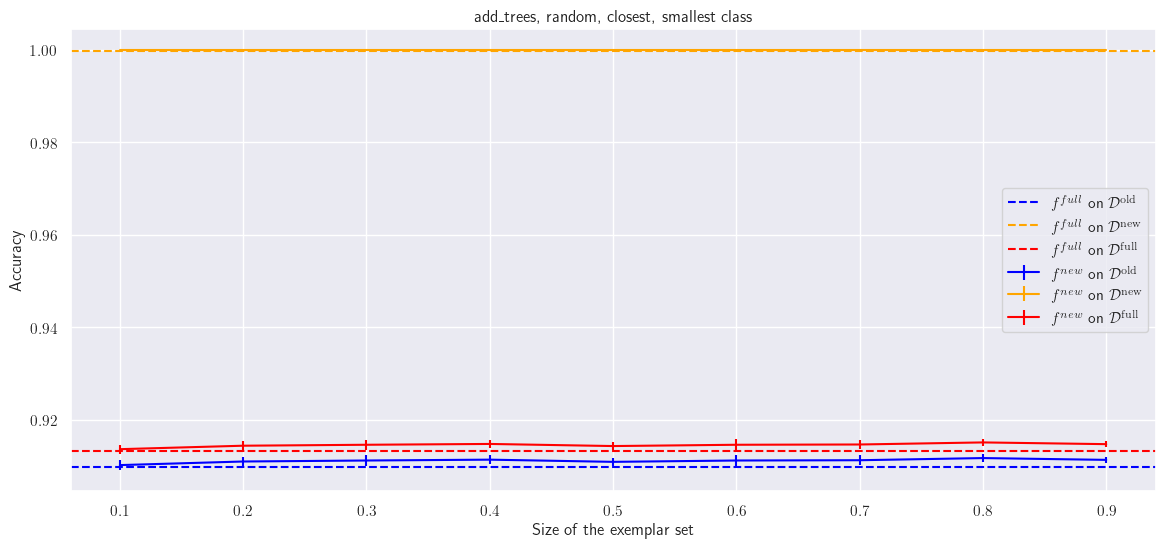

In [8]:
for training_method in ['continued_training', 'add_trees']:
    print(f'Training method: {training_method}')
    for new_class_idx in [largest_class_label, smallest_class_label]:
        if new_class_idx == largest_class_label:
            largest_or_smallest_class = 'largest class'
        elif new_class_idx == smallest_class_label:
            largest_or_smallest_class = 'smallest class'

        print(largest_or_smallest_class)
        
        batch_results = helper_funcs.unpack_batch_results(training_method, largest_or_smallest_class)
        
        for data_selection_method in ['split_criterion', 'dist_to_mean', 'nearest_neighbors', 'entropy']:
            for sort_type in ['closest', 'furthest']:
                experiment_results = helper_funcs.unpack_results(training_method, data_selection_method, sort_type, largest_or_smallest_class)
                helper_funcs.plot_results(training_method, experiment_results, batch_results, data_selection_method, sort_type, largest_or_smallest_class, save=True)
        
        # and once for random method
        experiment_results = helper_funcs.unpack_results(training_method, 'random', 'closest', largest_or_smallest_class)
        helper_funcs.plot_results(training_method, experiment_results, batch_results, 'random', 'closest', largest_or_smallest_class, save=True)